#**Exploratory Data Analysis on Adidas Sales Dataset**

##**Adidas Sales Dataset – Summary**

This dataset contains transactional-level sales data for Adidas products across different regions and retailers. It captures both revenue and profitability details, enabling analysis from multiple perspectives (time, geography, product, retailer, and sales channel).

##**Problem Statement**

Adidas, as a global sportswear brand, generates sales across multiple regions, retailers, and sales channels. However, without structured analysis, it is difficult to identify which regions, products, and retailers drive the most revenue and profit, and how different sales methods (online, offline, distributor) impact performance.

This project aims to perform Exploratory Data Analysis (EDA) on Adidas sales data to uncover trends, measure profitability, and highlight actionable insights that can guide business decisions on product focus, regional strategies, and channel optimization.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df = pd.read_excel("AdidasSalesdata.xlsx")
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [3]:
#checking data
print(df.shape)
print(df.info())


(9648, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64

In [4]:
#checking null values
print(df.isnull().sum())


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [5]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

In [6]:
#describing data
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119552,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [7]:
#checking unique values
df.nunique()

,0
Retailer,6
Retailer ID,4
Invoice Date,724
Region,5
State,50
City,52
Gender Type,2
Product Category,3
Price per Unit,94
Units Sold,361


In [8]:
#adding new column "Product" which includes (Product Category + Gender Type)
df['Product'] = df['Gender Type'] + df['Product Category']
df["Product"]

,Product
0,MenApparel
1,WomenApparel
2,MenStreet Footwear
3,MenAthletic Footwear
4,WomenStreet Footwear
...,...
9643,WomenApparel
9644,MenStreet Footwear
9645,MenAthletic Footwear
9646,WomenStreet Footwear


#**Overview**

In [9]:
#kpi's

In [10]:
#Total Revenue Generated
print("Total Revenue Generated: $",df['Total Sales'].sum())


Total Revenue Generated: $ 899902125.0


In [11]:
#Total Profit
print("Total Profit: $" ,df['Operating Profit'].sum())

Total Profit: $ 332134761.45000005


In [12]:
#Total Transactions
print("Total Transactions : ",df['Invoice Date'].value_counts().sum())


Total Transactions :  9648


In [13]:
#Total Quantity Purchased
print("Total Quantity Purchased : ",df['Units Sold'].sum())

Total Quantity Purchased :  2478861


In [14]:
#Average Profit Margin
print(f"Average Profit Margin:, {df['Operating Margin'].mean()*100:.2f}%")

Average Profit Margin:, 42.30%


In [15]:
#Now Move to the visuals

In [16]:
#Revenue Generated by products
Total_revenue_by_products = df.groupby('Product')['Total Sales'].sum().reset_index()
Total_revenue_by_products

,Product,Total Sales
0,MenApparel,123728632.0
1,MenAthletic Footwear,153673680.0
2,MenStreet Footwear,208826244.0
3,WomenApparel,179038860.0
4,WomenAthletic Footwear,106631896.0
5,WomenStreet Footwear,128002813.0


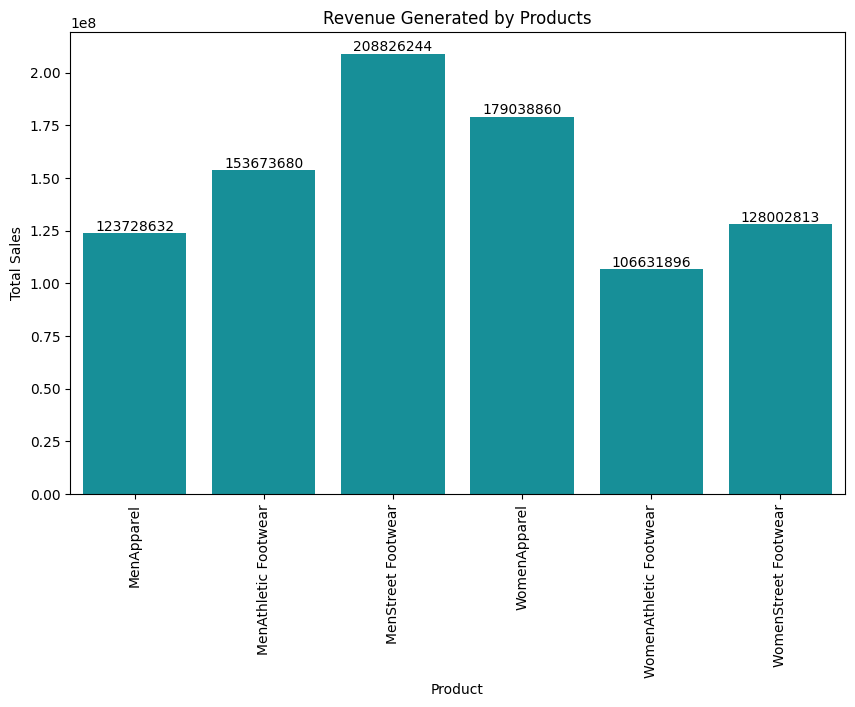

In [17]:
#Visualizing in chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Product',y='Total Sales',data=Total_revenue_by_products, color='#02A2AD')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')
plt.title('Revenue Generated by Products')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

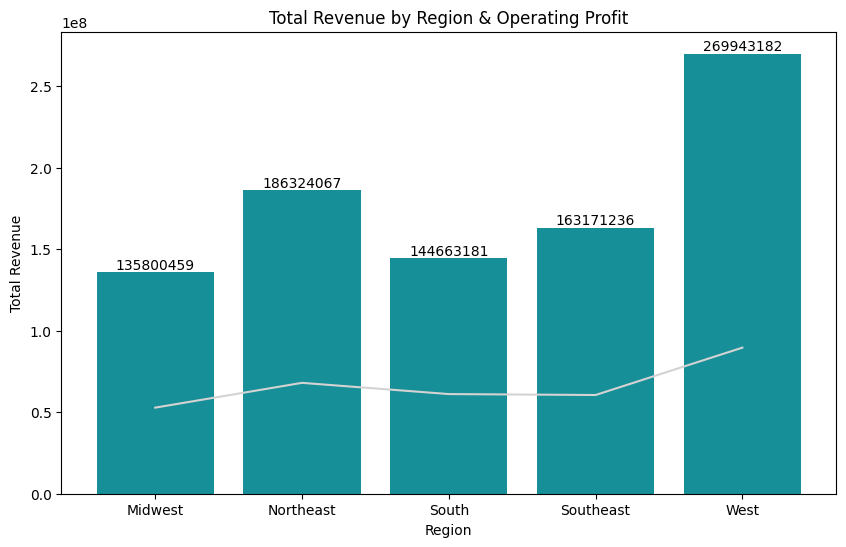

In [18]:
#Total Revenue & Operating Profit by Region
revenue_by_region =df.groupby('Region')['Total Sales'].sum().reset_index()
revenue_by_region

#Ploting in chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Region',y='Total Sales',data=revenue_by_region, color='#02A2AD')
for label in ax.containers:
    ax.bar_label(label, fmt="%.0f", label_type='edge', fontsize=10, color='black')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region & Operating Profit')

#Operating Profit
operating_profit_by_region = df.groupby('Region')['Operating Profit'].sum().reset_index()
operating_profit_by_region

#ploting in chart
sns.lineplot(x='Region',y='Operating Profit',data=operating_profit_by_region, color='lightgrey')
plt.show()

In [19]:
#adding year-month colimn for timeline analysis
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Year-Month'] = df['Invoice Date'].dt.strftime('%Y-%m')
df['Year-Month']

,Year-Month
0,2021-10
1,2021-10
2,2021-10
3,2021-10
4,2021-10
...,...
9643,2020-03
9644,2020-03
9645,2020-03
9646,2020-03


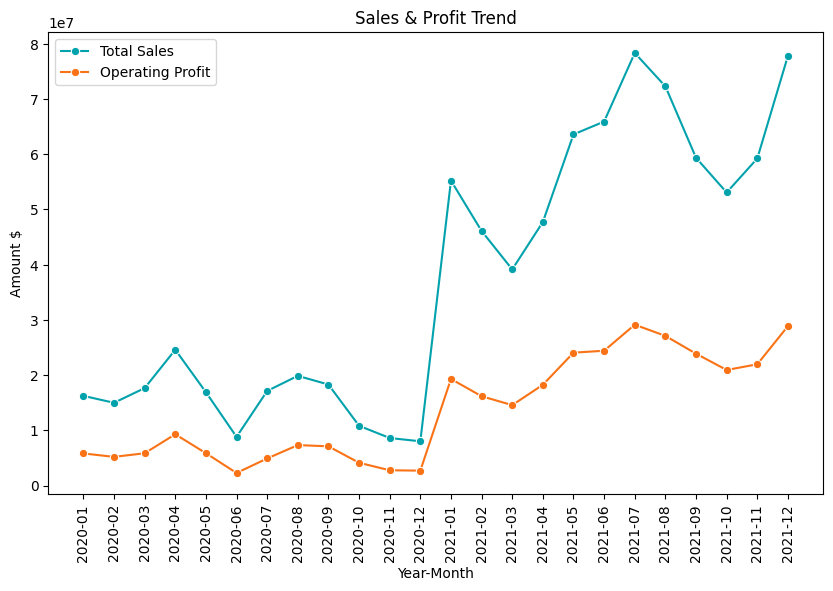

In [20]:
#Sales & Profit trend
sales_profit_trend = df.groupby('Year-Month').agg({'Total Sales':'sum','Operating Profit':'sum'}).reset_index()
sales_profit_trend.head(5)

#ploting in chart
plt.figure(figsize=(10,6))
sns.lineplot(x='Year-Month', y='Total Sales', data=sales_profit_trend, label='Total Sales', marker='o', color='#02A2AD')
sns.lineplot(x='Year-Month', y='Operating Profit', data=sales_profit_trend, label='Operating Profit', marker='o', color='#F97316')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.ylabel('Amount $')
plt.title('Sales & Profit Trend')
plt.legend()
plt.show()

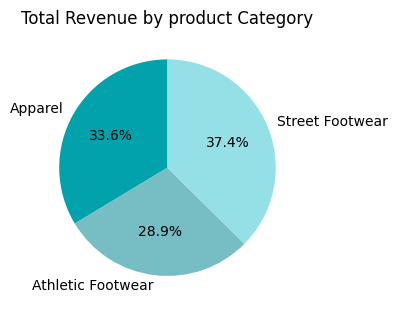

In [68]:
#Total revenue by product category
revenue_by_product_category = df.groupby('Product Category')['Total Sales'].sum().reset_index()
revenue_by_product_category

#ploting in chart
plt.figure(figsize=(4,5))
colors = ['#02A2AD','#76BEC3','#95E0E6']
plt.pie(revenue_by_product_category['Total Sales'],
        labels=revenue_by_product_category['Product Category'],
        startangle=90,
        autopct= "%1.1f%%",
        colors=colors)
plt.tight_layout()
plt.title('Total Revenue by product Category')
plt.show()

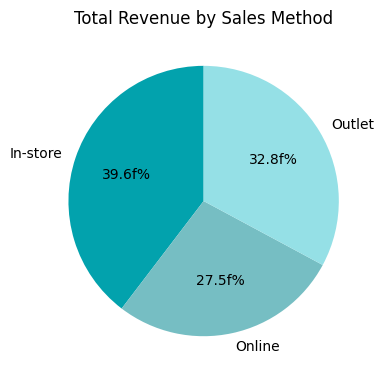

In [67]:
#Toal revenue by sales method
total_revenue_sales_method = df.groupby('Sales Method')['Total Sales'].sum().reset_index()
total_revenue_sales_method

#ploting in charrt
plt.figure(figsize=(4,5))
colors = ['#02A2AD','#76BEC3','#95E0E6']
plt.pie(total_revenue_sales_method['Total Sales'],
        labels=total_revenue_sales_method['Sales Method'],
        colors=colors,
        autopct='%1.1ff%%',
        startangle=90)
plt.tight_layout()
plt.title('Total Revenue by Sales Method')
plt.show()

#**Regional Analysis**

In [23]:
#Profit by region
profit_region = df.groupby('Region')['Operating Profit'].sum().reset_index()
profit_region

profit_regions = profit_region.sort_values(by='Operating Profit', ascending=False)
profit_regions

,Region,Operating Profit
4,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
0,Midwest,52811346.48


In [24]:
#Profit by city
profit_city = df.groupby('City')['Operating Profit'].sum().reset_index()
profit_city.head(6)

profit_cities = profit_city.sort_values(by='Operating Profit', ascending=False)
profit_cities.head(6)

,City,Operating Profit
10,Charleston,15607190.11
35,New York,13899973.16
31,Miami,12168619.11
42,Portland,10760799.37
46,San Francisco,10256249.56
22,Houston,9845141.06


In [25]:
#profit by state
profit_state = df.groupby('State')['Operating Profit'].sum().reset_index()
profit_state.head(6)

profit_states = profit_state.sort_values(by='Operating Profit', ascending=False)
profit_states.head(6)

,State,Operating Profit
31,New York,23329824.07
8,Florida,20926206.92
4,California,19301170.40
42,Texas,18688204.35
39,South Carolina,11324236.39
32,North Carolina,9756422.87


**KPI**

In [26]:
#Best performing state
print(f'Best performing state: {profit_states.iloc[0,0]} with profit of {profit_state.iloc[0,1]}')

Best performing state: New York with profit of 9147581.39


In [27]:
#Best performing city
print(f'Best performing city: {profit_cities.iloc[0,0]} with profit of {profit_city.iloc[0,1]}')

Best performing city: Charleston with profit of 9429850.91


In [28]:
#Best performing region
print(f'Best performing region: {profit_regions.iloc[0,0]} with profit of {profit_region.iloc[0,1]}')

Best performing region: West with profit of 52811346.48


#**Visuals**

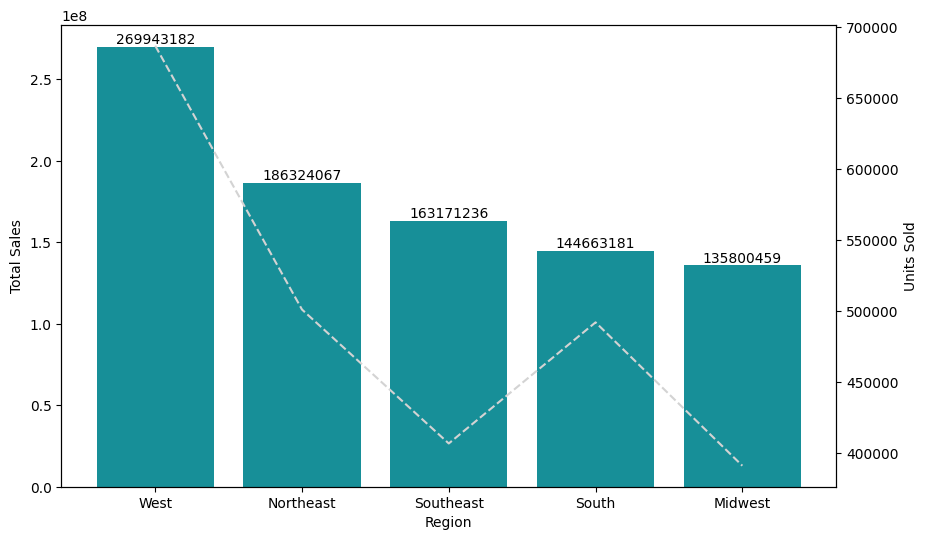

In [29]:
#Total revenue and unit sold by region
revenue_by_region = df.groupby('Region')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)
revenue_by_region

#Quantity purchase by region
quant_by_region = df.groupby('Region')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)
quant_by_region

#plt in chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Region',y='Total Sales',data=revenue_by_region, color='#02A2AD')
for bar in ax.containers:
  ax.bar_label(bar, label_type='edge', fmt="%.0f")

#ploting unit sold
ax2 = ax.twinx()
sns.lineplot(x='Region',y='Units Sold',data=quant_by_region, color='lightgrey',linestyle='--')
plt.show()

In [30]:
#Top 10 cities by revenue
revenue_city = (
    df.groupby('City')['Total Sales']
      .sum()
      .reset_index()
      .sort_values(by='Total Sales', ascending=False)
      .head(10)
)
revenue_city




,City,Total Sales
10,Charleston,39974797.0
35,New York,39801235.0
46,San Francisco,34539220.0
31,Miami,31600863.0
42,Portland,30545652.0
39,Orlando,27682851.0
47,Seattle,26330718.0
28,Los Angeles,25634913.0
22,Houston,25456882.0
0,Albany,24427804.0


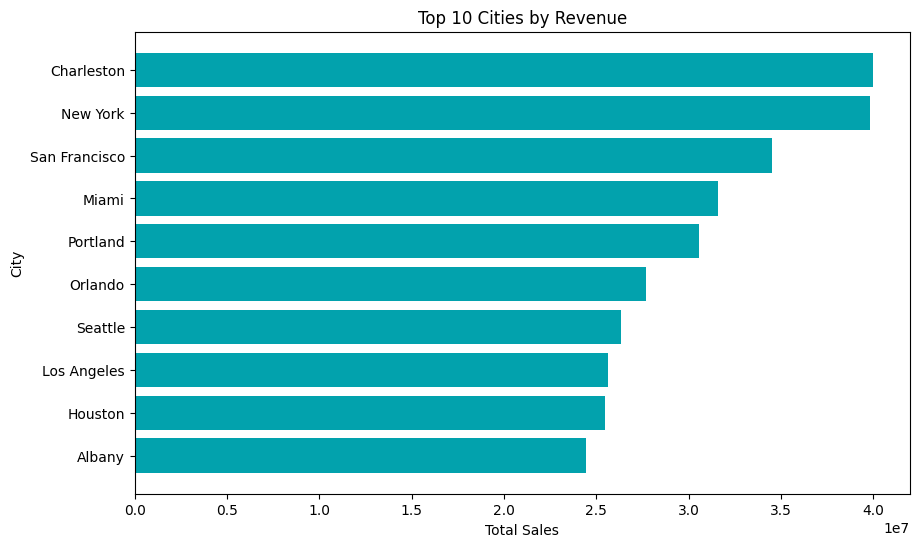

In [31]:
#plt in chart
plt.figure(figsize=(10,6))
ax = plt.barh(revenue_city['City'][::-1], revenue_city['Total Sales'][::-1], color='#02A2AD')
plt.xlabel('Total Revenue')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Top 10 Cities by Revenue')
plt.show()

#**Product Analysis**

In [35]:
#Total Products
print(f'Total Products {df['Product'].nunique()}')
print(f'Total Products {df["Product"].unique()}')

Total Products 6
Total Products ['MenApparel' 'WomenApparel' 'MenStreet Footwear' 'MenAthletic Footwear'
 'WomenStreet Footwear' 'WomenAthletic Footwear']


In [37]:
#Total Category
print(f'Total Category {df['Product Category'].nunique()}')
print(f'Total Category {df["Product Category"].unique()}')
#

Total Category 3
Total Category ['Apparel' 'Street Footwear' 'Athletic Footwear']


In [47]:
#Top performaing product
top_product = (
df.groupby('Product')['Total Sales']
                .sum()
                . reset_index()
                .sort_values(by='Total Sales', ascending= False, ignore_index= True).head(1))
top_product

,Product,Total Sales
0,MenStreet Footwear,208826244.0


In [49]:
#Top performing product category
top_product_cat = (df.groupby('Product Category')['Total Sales']
                   .sum()
                   .reset_index()
                   .sort_values(by='Total Sales', ascending=False, ignore_index= True).head(1))
top_product_cat

,Product Category,Total Sales
0,Street Footwear,336829057.0


In [55]:
#Total transactions by product category
total_transactions_by_product_cat = df.groupby('Product Category')['Units Sold'].count().reset_index()
total_transactions_by_product_cat

,Product Category,Units Sold
0,Apparel,3214
1,Athletic Footwear,3216
2,Street Footwear,3218


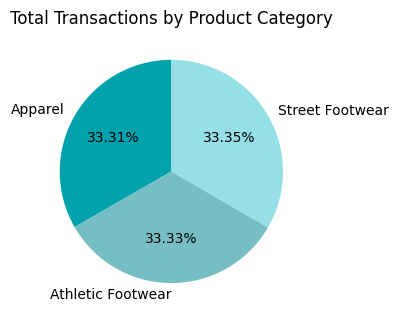

In [65]:
#plting in chart
plt.figure(figsize=(4,6))
colors = ['#02A2AD','#76BEC3','#95E0E6']
plt.pie(total_transactions_by_product_cat['Units Sold'],
        labels=total_transactions_by_product_cat['Product Category'],
        autopct='%1.2f%%',
        colors=colors,
        startangle=90)
plt.tight_layout()
plt.title('Total Transactions by Product Category')
plt.show()

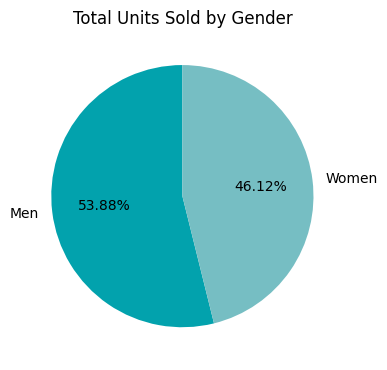

In [69]:
#Total units sold by gender
total_units_sold_by_gender = df.groupby('Gender Type')['Units Sold'].sum().reset_index()
total_units_sold_by_gender

#ploting in chart
plt.figure(figsize=(4,6))
colors = ['#02A2AD','#76BEC3','#95E0E6']
plt.pie(total_units_sold_by_gender['Units Sold'],
        labels=total_units_sold_by_gender['Gender Type'],
        autopct='%1.2f%%',
        colors=colors,
        startangle=90)
plt.tight_layout()
plt.title('Total Units Sold by Gender')
plt.show()

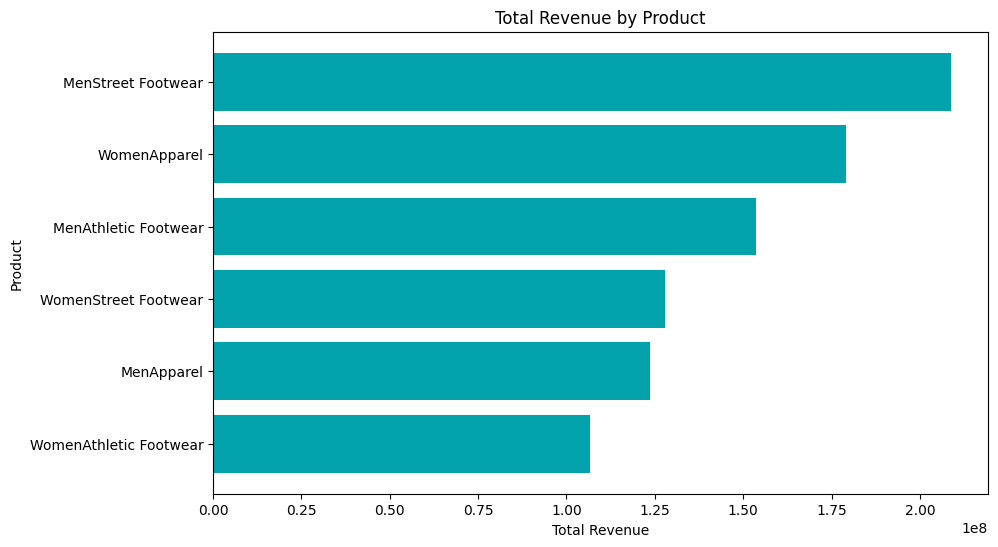

In [76]:
#Total revenue by product
total_revenue_by_product = (df.groupby('Product')['Total Sales']
                            .sum()
                            .reset_index()
                            .sort_values(by='Total Sales', ascending= False))
total_revenue_by_product

#plting in chart
plt.figure(figsize=(10,6))
ax = plt.barh(total_revenue_by_product['Product'][::-1], total_revenue_by_product['Total Sales'][::-1], color='#02A2AD')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Total Revenue by Product')
plt.show()

In [77]:
# making a scatter plot to see the relationship between various factors

product_data = (df.groupby('Product')[['Total Sales','Units Sold','Operating Profit','Operating Margin']]
                .agg({"Total Sales":"sum","Units Sold":"sum","Operating Profit":"sum","Operating Margin":"mean"})
                .reset_index())
product_data

,Product,Total Sales,Units Sold,Operating Profit,Operating Margin
0,MenApparel,123728632.0,306683,44763030.33,0.413225
1,MenAthletic Footwear,153673680.0,435526,51846888.19,0.402702
2,MenStreet Footwear,208826244.0,593320,82802260.62,0.446130
3,WomenApparel,179038860.0,433827,68650970.56,0.441318
4,WomenAthletic Footwear,106631896.0,317236,38975784.94,0.424359
5,WomenStreet Footwear,128002813.0,392269,45095826.81,0.410199


In [78]:
!pip install plotly

In [79]:
import plotly
import plotly.express as px

In [80]:
fig =px.scatter(product_data,x='Total Sales',y='Operating Profit',
                size='Units Sold',
                color ='Operating Margin',
                text = 'Product',color_continuous_scale='Blues' )
fig.update_traces(textfont_size=10, textposition="top center")
fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Operating Profit",
    legend_title="Margin"
)

fig.show()

#**Retailer Analysis**

In [ ]:
#kpis

In [82]:
# total Retailers
print(f'Total Retailers {df["Retailer"].nunique()}')

Total Retailers 6 Retailers


In [85]:
#which retailer gets the most profit

profit_by_retailers = (df.groupby('Retailer')['Operating Profit']
                       .sum()
                       .reset_index()
                       .sort_values(by ='Operating Profit',ascending = False,ignore_index = True))
print(f'The top Retailer by profit {profit_by_retailers.iloc[0,0]} with a profit of ${profit_by_retailers.iloc[0,1]:,.2f} ')

The top Retailer by profit West Gear with a profit of $85,667,873.18 


In [84]:
#which retailer sells the most units

units_by_retailers = (df.groupby('Retailer')['Units Sold']
                      .sum()
                      .reset_index()
                      .sort_values(by ='Units Sold',ascending = False,ignore_index = True))
print(f'The top Retailer by unit sold  {units_by_retailers.iloc[0,0]} with a total of {units_by_retailers.iloc[0,1]:,} Units Sold')

The top Retailer by unit sold  West Gear with a total of 625,262 Units Sold


In [86]:
#which retailer earns the most revenue
revenue_by_retailers = (df.groupby('Retailer')['Total Sales']
                        .sum()
                        .reset_index()
                        .sort_values(by ='Total Sales',ascending = False,ignore_index = True))
print(f'The most revenue generated Retailer is  {revenue_by_retailers.iloc[0,0]} with a revenue of ${revenue_by_retailers.iloc[0,1]:,.2f}')

The most revenue generated Retailer is  West Gear with a revenue of $242,964,333.00


In [87]:
#which retailer most transactions

transactions_by_retailers = df.groupby('Retailer').size().reset_index(name = 'Total Transactions')
print(f'The Retailer with most Transactions is {transactions_by_retailers.iloc[0,0]} with a total of {transactions_by_retailers.iloc[0,1]:,} Transactions')

The Retailer with most Transactions is Amazon with a total of 949 Transactions


#**Visuals**

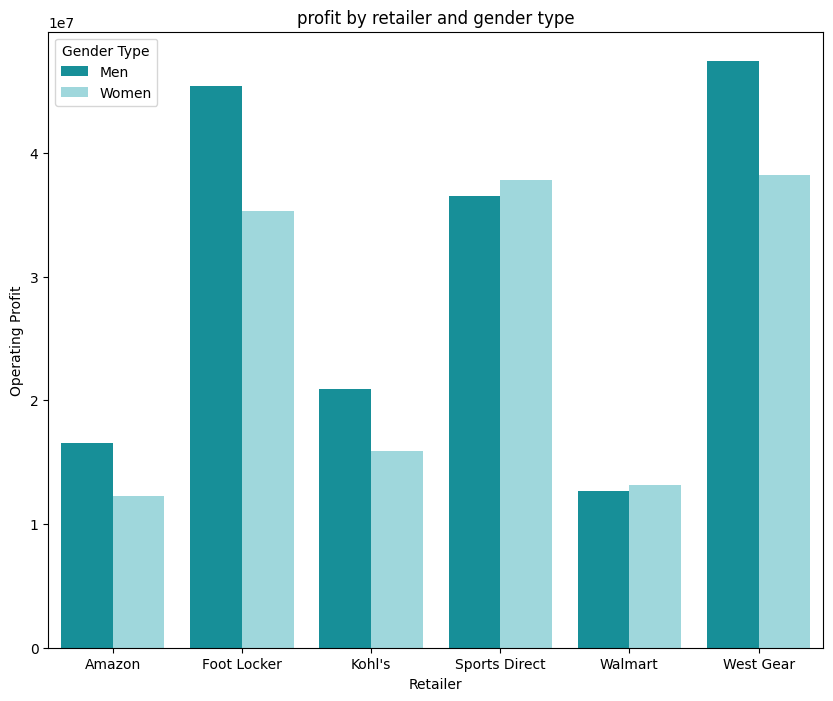

In [88]:
# profit by retailer and gender type
profit_by_gender_retailer = df.groupby(['Retailer','Gender Type'])['Operating Profit'].sum().reset_index()

plt.figure(figsize = (10,8))
sns.barplot(data = profit_by_gender_retailer,x = 'Retailer',
            y = 'Operating Profit',
            hue = 'Gender Type',
            palette = ["#02A2AD","#95E0E6"])
plt.title("profit by retailer and gender type")
plt.show()

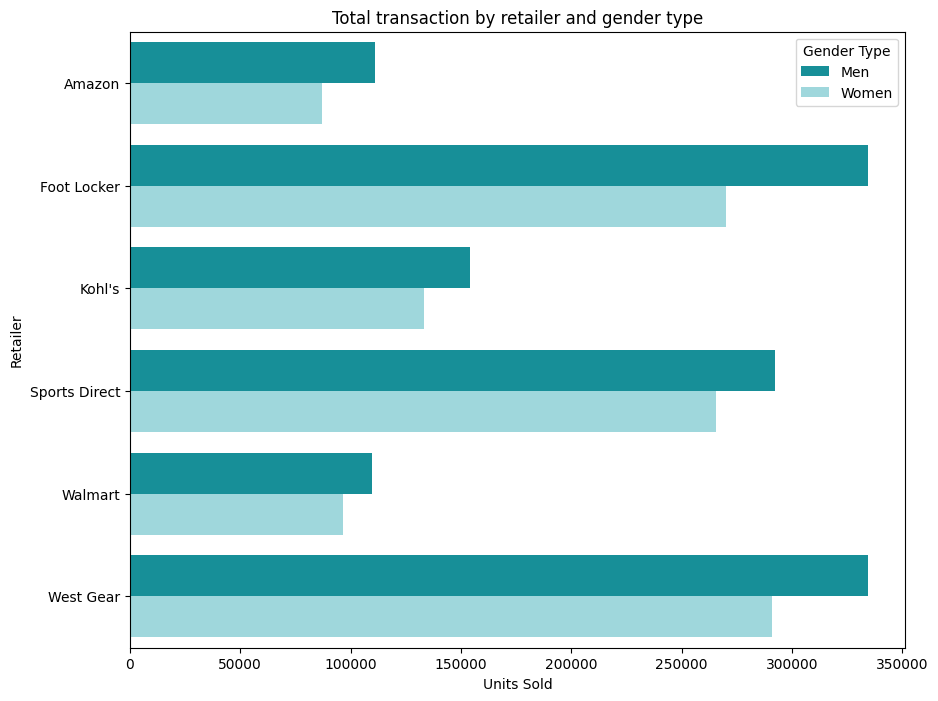

In [90]:
# units sold by retailer and gender type
units_by_gender_retailer = df.groupby(['Retailer','Gender Type'])['Units Sold'].sum().reset_index()

plt.figure(figsize = (10,8))
sns.barplot(data = units_by_gender_retailer
            ,y = 'Retailer'
            ,x = 'Units Sold'
            ,hue = 'Gender Type'
            ,palette = ["#02A2AD","#95E0E6"]
            ,orient='h')
plt.title("Total transaction by retailer and gender type")
plt.show()

#**Sales Method Analysis**

In [93]:
# total Sales Method
print(f'Total Sales Method {df["Sales Method"].nunique()}')
print(f'Total Sales Method {df["Sales Method"].unique()}')

Total Sales Method 3
Total Sales Method ['Outlet' 'Online' 'In-store']


In [95]:
#which Sales Method gets the most profit

profit_by_SM = (df.groupby('Sales Method')['Operating Profit']
                .sum()
                .reset_index()
                .sort_values(by ='Operating Profit',ascending = False,ignore_index = True))
print(f'The most profit sales method is {profit_by_SM.iloc[0,0]} with a profit of ${profit_by_SM.iloc[0,1]:,.2f} ')

The most profit sales method is In-store with a profit of $127,591,287.50 


In [96]:
#which Sales Method sells the most units

units_by_SM = (df.groupby('Sales Method')['Units Sold']
               .sum()
               .reset_index()
               .sort_values(by ='Units Sold',ascending = False,ignore_index = True))
print(f'The Sales Method that sells the Most Units is {units_by_SM.iloc[0,0]} with a total of {units_by_SM.iloc[0,1]:,} Units Sold')

The Sales Method that sells the Most Units is Online with a total of 939,093 Units Sold


In [97]:
#which Sales Method earns the most revenue

revenue_by_SM = (df.groupby('Sales Method')['Total Sales']
                 .sum()
                 .reset_index()
                 .sort_values(by ='Total Sales',ascending = False,ignore_index = True))
print(f'The Sales Method that earns the most revenue is {revenue_by_SM.iloc[0,0]} with a revenue of ${revenue_by_SM.iloc[0,1]:,.2f}')

The Sales Method that earns the most revenue is In-store with a revenue of $356,643,750.00


#**Visuals**

In [99]:
#Revenue Over time by Sales Method

revenue_by_SM = df.groupby(['Year-Month','Sales Method'])['Total Sales'].sum().reset_index()

colors = ['#02A2AD','#76BEC3','#95E0E6']
px.line(revenue_by_SM,x = 'Year-Month',y = 'Total Sales',color='Sales Method',markers= True,color_discrete_sequence = colors)

In [103]:
# Transactions by Sales Methods

transactions_by_SM = df.groupby('Sales Method').size().reset_index(name = "Total Transactions")
colors =['#02A2AD','#76BEC3','#95E0E6']
px.pie(transactions_by_SM ,names = 'Sales Method', values = 'Total Transactions',color_discrete_sequence = colors,hole = 0.5 )